# Palabras clave:

Bayes, Naive Bayes Multinomial y Gaussiano, Probabilidad, Probabilidad condicional, Likelihood, Verosimilitud, Clasificación, Tokenización, Stemming, Lemmatización, Distribución, Stop Words, NLTK, Count Vectorizer, Vocabulario, sklearn, dataframe, pandas, sparse matrix, NLP.

In [1]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

# Teorema de Bayes

Analicemos el siguiente diagrama:

![Diagrama de Venn](venn.png "Probabilidades de A y B")

Recordemos:

$P(A)$: Probabilidad de que ocurra un evento A.  
$P(B)$: Probabilidad de que ocurra un evento B.  
$P(A\cap B)$: Probabilidad de que ocurran los eventos A y B en simultáneo. Si son independientes: $P(A\cap B)=P(A).P(B)$.  

$P(A|B)$: Probabilidad de que haya ocurrido el evento A,si sabemos que ocurrió el evento B. Si son independientes: $P(A|B)=\frac{P(A\cap B)}{P(B)}$.

También podemos analizar qué pasa para el caso de $P(B|A)$, es decir, la probabilidad de que haya ocurrido el evento B, si sabemos que ocurrió el evento A. Si son independientes: $P(B|A)=\frac{P(B\cap A)}{P(A)}$

Igualando $P(B\cap A)$ con $P(A\cap B)$ nos queda:

$P(A|B).P(B)=P(B|A).P(A)$

Despejando:

$$P(B|A)=\frac{P(A|B).P(B)}{P(A)}$$

A la ecuación anterior se la conoce como corolario del Teorema de Bayes. Es de particular interés en el ámbito de Machine Learning ya que a partir de un conjunto de observaciones nos permite estimar qué modelo dió origen a dichas observaciones.

Supongamos que tenemos causas $B_i$ y  efectos $A_j$. Las $B_i$ causas, pueden generar $A_j$ efectos.

Los efectos $A_j$ son exhaustivos es decir: $\sum_kP(A_j)=1$.
Las causas $B_i$ también son exhaustivas.

$P(B_i)$ es la probabilidad de que se dé la causa $B_i$.
$P(A_j)$ es la probabilidad de haber medido el efecto $A_j$.

Un ejemplo:

Tengo una bolsa con cinco monedas del tipo 1, cuya $p_1=0.3$, tres monedas del tipo 2, con $p_2=0.5$ y dos monedas del tipo 3, con  $p_3=0.8$.

Es decir, la distribución de probabilidad de medir el efecto A (que salga H o T) estará condicionada por la causa B (usar una moneda de tipo 1, 2 o 3).

$P(B_i)$ Es la probabilidad de sacar de la bolsa una moneda tipo $i$. Por lo tanto:

$P(B_1)=0.5$, $P(B_2)=0.3$ y $P(B_3)=0.2$

Supongamos ahora que las monedas son indistinguibles entre sí y solo tengo el dato de las $P(B_i)$. Una forma de sacar una moneda al azar de la bolsa y determinar a qué tipo pertenece, es tirarla n veces y hacerme la siguiente pregunta:

¿Qué probabilidad hay de haber sacado una moneda del tipo 1 y haber obtenido este resultado? ¿Y de haber sacado una moneda del tipo 2 y haber obtenido este resultado? ¿Y tipo 3?

Es decir nos interesa estimar las probabilidades $P(B_1|A_j)$, $P(B_2|A_j)$ y $P(B_3|A_j)$.

Nuevamente: $P(B_1|A_j)$ puede leerse como "La probabilidad de haber sacado una moneda del tipo 1 si el resultado de arrojarla n veces fue $A_j$. Si calculamos todos los $P(B_i|A_j)$ podemos compararlos entre sí y decir que la causa $B_i$ fue aquella que tiene la probabilidad $P(B_i|A_j)$ mas alta.

Si aplicamos el Teorema de Bayes:

$$P(B_i|A_j)=\frac{P(A_j|B_i).P(B_i)}{P(A_j)}$$

Si sólo nos interesa comparar las $P(B_i|A_j)$ para saber cuál es la causa mas probable, podemos evitar calcular $P(A_j)$ ya que es el mismo para todas las $P(B_i|A_j)$ y solo comparar los numeradores. Podemos definir:

$$\mathcal{L}_i=P(A_j|B_i).P(B_i)$$

A $\mathcal{L}_i$ se lo denomina "medida de verosimilitud de la causa o modelo i". En inglés se lo denomina Likelihood.

Elegir qué modelo es mas probable que haya generado ese efecto (u observación) es equivalente a elegir al modelo cuya medida de verosimilitud sea mayor.

Volviendo a la $P(A_j)$ que dejamos de lado, la misma puede ser calculada como:

$$P(A_j)=\sum_k{P(A_j|B_k).P(B_k)}$$

Por lo tanto, las probabilidades $P(B_i|A_j)$ equivalen al Likelihood normalizado. Es decir:

$$P(B_i|A_j)=\frac{\mathcal{L}_i}{\sum_k{\mathcal{L}_k}}=\frac{P(A_j|B_i).P(B_i)}{\sum_k{P(A_j|B_k).P(B_k)}}$$


Apliquemos ahora estos conceptos a resolver el siguiente problema:

Dadas las moneda en la bolsa descriptas anteriormente, se realiza el siguiente experimento:

Se saca una moneda al azar, se tira 3 veces la moneda y se obtiene el siguiente resultado:

H-H-T

- Estimar el tipo de moneda
- Calcular la probabilidad de que la estimación sea errónea
- Calcular la probabilidad de que la moneda sea de tipo 3

Repetir el problema si lo que se obtuvo fue H-H-T-T-H-T-H

In [2]:
#Calculo el likelihood del modelo 1:
p1=0.3 #probabilidad de sacar cara para la moneda del tipo 1
p2=0.5
p3=0.8
PB1=0.5 #Probabilidad de sacar una moneda tipo 1 de la bolsa
PB2=0.3
PB3=0.2
L1=p1*p1*(1-p1)*PB1
L2=p2*p2*(1-p2)*PB2
L3=p3*p3*(1-p3)*PB3

print("La medida de verosimilitud del modelo 1 para la observación H-H-T es:{}".format(L1))
print("La medida de verosimilitud del modelo 2 para la observación H-H-T es:{}".format(L2))
print("La medida de verosimilitud del modelo 3 para la observación H-H-T es:{}".format(L3))

La medida de verosimilitud del modelo 1 para la observación H-H-T es:0.0315
La medida de verosimilitud del modelo 2 para la observación H-H-T es:0.0375
La medida de verosimilitud del modelo 3 para la observación H-H-T es:0.0256


Por lo tanto el modelo mas probable es el 2. Para saber cual es la probabilidad de que la estimación sea errónea tenemos que calcular las probabilidades condicionales. Lo podemos hacer normalizando con respecto a la suma de los Likelihoods.

In [3]:
print("La probabilidad de que la estimación sea correcta es:{}".format(L2/(L1+L2+L3)))
print("La probabilidad de que la estimación sea errónea es:{}".format(1-L2/(L1+L2+L3)))
print("La probabilidad de que la moneda sea del tipo 3 es:{}".format(L3/(L1+L2+L3)))

La probabilidad de que la estimación sea correcta es:0.3964059196617336
La probabilidad de que la estimación sea errónea es:0.6035940803382664
La probabilidad de que la moneda sea del tipo 3 es:0.27061310782241016


Por lo tanto si bien la estimación es que la moneda es del tipo 2, lo mas probable es que estemos equivocados. Para H-H-T-T-H-T-H:

In [4]:
L1=p1**4*(1-p1)**3*PB1
L2=p2**4*(1-p2)**3*PB2
L3=p3**4*(1-p3)**3*PB3

print("La medida de verosimilitud del modelo 1 para la observación H-H-T es:{}".format(L1))
print("La medida de verosimilitud del modelo 2 para la observación H-H-T es:{}".format(L2))
print("La medida de verosimilitud del modelo 3 para la observación H-H-T es:{}".format(L3))

La medida de verosimilitud del modelo 1 para la observación H-H-T es:0.0013891499999999996
La medida de verosimilitud del modelo 2 para la observación H-H-T es:0.00234375
La medida de verosimilitud del modelo 3 para la observación H-H-T es:0.0006553599999999998


In [5]:
print("La probabilidad de que la estimación sea correcta es:{}".format(L2/(L1+L2+L3)))
print("La probabilidad de que la estimación sea errónea es:{}".format(1-L2/(L1+L2+L3)))
print("La probabilidad de que la moneda sea del tipo 3 es:{}".format(L3/(L1+L2+L3)))

La probabilidad de que la estimación sea correcta es:0.5340955184970808
La probabilidad de que la estimación sea errónea es:0.4659044815029192
La probabilidad de que la moneda sea del tipo 3 es:0.1493439313076253


A medida que aumenta la cantidad de muestras la estimación se va haciendo cada vez mas precisa, pero los valores de probabilidad son cada vez mas chicos, lo cual puede traer problemas para observaciones muy grandes por ejemplo, clasificación de artículos periodísticos o detección de SPAM, ya que estaría compuesto una gran cantidad de multiplicaciones de números mucho mas chicos que 1. Por ello es que se suele utilizar el Log-Likelihood ($\mathcal{logL}$).

El logaritmo es monótono creciente, por lo que la relación entre los Likelihoods no se ve alterada a la hora de compararlos.  
Las multiplicaciones se convierten en suma, por lo que es mucho menos probable que estemos trabajando en los límites de la precisión del procesador.

Para el caso del H-H-T-T-H-T-H los $\mathcal{logL}_i$ quedan:

In [6]:
import math
logL1=4*math.log(p1)+3*math.log(1-p1)+math.log(PB1)
logL2=4*math.log(p2)+3*math.log(1-p2)+math.log(PB2)
logL3=4*math.log(p3)+3*math.log(1-p3)+math.log(PB3)

print("El Log-Likelihood del modelo 1 para la observación H-H-T-T-H-T-H es:{}".format(logL1))
print("El Log-Likelihood del modelo 2 para la observación H-H-T-T-H-T-H es:{}".format(logL2))
print("El Log-Likelihood del modelo 3 para la observación H-H-T-T-H-T-H es:{}".format(logL3))


El Log-Likelihood del modelo 1 para la observación H-H-T-T-H-T-H es:-6.579063229679887
El Log-Likelihood del modelo 2 para la observación H-H-T-T-H-T-H es:-6.056003068245553
El Log-Likelihood del modelo 3 para la observación H-H-T-T-H-T-H es:-7.330325854993241


# Naive Bayes

En el reciente caso las probabilidades de ocurrencia de H o T quedaban multiplicadas ya que se asume independencia entre una tirada y otra de la moneda.
Naive Bayes es una técnica estadística que consiste en repetir el método anterior en problemas cuyos sucesos no son independientes, pero suponiendo independencia.
Pongamos como ejemplo la clasificación de artículos periodísticos. En este caso podríamos estimar la probabilidad de ocurrencia de cada palabra según la categoría a la que pertenece el artículo.

Veamos un ejemplo concreto

In [7]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True) # Diccionario

In [8]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [9]:
len(twenty_train["data"]) #Cantidad de artículos periodísticos

11314

In [10]:
len(twenty_train["target"]) #Cantidad de clasificaciones. Debería coincidir con la cantidad de artículos

11314

In [11]:
twenty_train["target"] #Clasificaciones de los artículos

array([7, 4, 4, ..., 3, 1, 8])

In [12]:
twenty_train["target_names"] #Referencia de las clasificaciones. 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
len(twenty_train["target_names"]) #Cantidad de categorías

20

In [14]:
twenty_train.data[0] # Primer artículo

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [15]:
twenty_train.target[0] #Código de clasificación del primer artículo

7

In [16]:
twenty_train.target_names[7] #Clasificación del primer artículo

'rec.autos'

En resumen, tenemos un dataset que contiene 11314 artículos periodísticos, clasificados en 20 tipos.
Ahora vamos a armar un bag of words y a filtrar un poco el vocabulario.

Vamos a aplicar el siguiente procesamiento:

- Tokenization (nltk)
- Lemmatization (nltk)
- Stop Words (nltk)
- Stemming (nltk)
- Filtrado de palabras
- Obtención del vocabulario (countvectorizer)
- Estimación de la probabilidad de ocurrencia de cada palabra para cada categoría
- Estimación de la probabilidad de cada categoría

Mas info en:
http://text-processing.com/demo/stem/

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
#for art in twenty_train.data:
art=twenty_train.data[0]
tok=word_tokenize(art)
print("\nArtículo tokenizado:")
print(tok)
lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
print("\nLematización")
print(lem)
stop = [x for x in lem if x not in stopwords.words('english')]
print("\nEliminando stopwords:")
print(stop)
stem=[stemmer.stem(x) for x in stop]
print("\nAplicando stemming")
print(stem)
alpha=[x for x in stem if x.isalpha()]
print("\nFiltrando no-palabras:")
print(alpha)

[nltk_data] Downloading package wordnet to /home/cselmo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/cselmo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/cselmo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Artículo tokenizado:
['From', ':', 'lerxst', '@', 'wam.umd.edu', '(', 'where', "'s", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp-Posting-Host', ':', 'rac3.wam.umd.edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2-door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors',

In [21]:
#Procesando todos los artículos:
articulos_filtrados=list()
for idx in range(len(twenty_train.data)):
    if idx%100==0:
        print(idx)
    art=twenty_train.data[idx]
    tok=word_tokenize(art)
    lem=[lemmatizer.lemmatize(x,pos='v') for x in tok]
    stop = [x for x in lem if x not in stopwords.words('english')]
    stem=[stemmer.stem(x) for x in stop]
    alpha=[x for x in stem if x.isalpha()]
    articulos_filtrados.append(" ".join(alpha))

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300


NameError: name 'articulos' is not defined

In [22]:
print(articulos_filtrados[6])

from bmdelan brian man delaney subject brain tumor treatment thank bmdelan organ univers chicago line there peopl respond request info treatment astrocytoma email I could thank directli prob sean debra sharon So I think I publicli thank everyon thank I sure glad I accident hit rn instead rm I tri delet file last septemb hmmm


In [23]:
#Salvado del procesamiento a disco:
import pickle

with open('art_filt.txt', 'wb') as fp:
    pickle.dump(articulos_filtrados, fp)

In [24]:
with open ('art_filt.txt', 'rb') as fp:
    itemlist = pickle.load(fp)

In [26]:
print(itemlist[16])

from ab allen B subject Re tiff philosoph signific organ purdu univers line In articl prestonm martin preston write whi use PD C librari tiff file It take good minut start use app I certainli use whenev I tiff usual work well that point I philosoph oppos complex thi complex lead program poor tiff writer make bizarr file program inabl load tiff imag though save cours gener inabl interchang imag differ environ despit fact think understand tiff As say go It I worri asshol I big troubl misus abus tiff year I chalk immens unnecessari complex format In word tiff spec appendix G page capit emphasi mine the problem sort success tiff design power flexibl expens simplic It take fair amount effort handl option current defin specif probabl NO applic doe A complet job current way sure abl import tiff imag sinc mani applic If program wors applic ca read everi tiff imag mean I might deal whi would I want imag trap format I neither anyon agre anyon cours ab


In [32]:
# Extracting features from articles
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.8,min_df=10)
count_vect.fit(itemlist) #Aprende el vocabulario y le asigna un código a cada palabra

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [36]:
count_vect.vocabulary_ #Estos son los índices de cada una de las palabras

{'thing': 8119,
 'what': 8880,
 'car': 1177,
 'univers': 8503,
 'maryland': 4886,
 'colleg': 1519,
 'park': 5872,
 'wonder': 8981,
 'anyon': 358,
 'could': 1770,
 'enlighten': 2621,
 'saw': 7052,
 'day': 1983,
 'it': 4169,
 'sport': 7591,
 'look': 4702,
 'late': 4510,
 'earli': 2464,
 'call': 1127,
 'the': 8082,
 'door': 2354,
 'realli': 6566,
 'small': 7423,
 'in': 3907,
 'addit': 86,
 'front': 3137,
 'bumper': 1061,
 'separ': 7182,
 'rest': 6759,
 'bodi': 892,
 'thi': 8111,
 'know': 4428,
 'if': 3841,
 'model': 5163,
 'name': 5340,
 'engin': 2614,
 'spec': 7546,
 'year': 9088,
 'product': 6315,
 'make': 4822,
 'histori': 3669,
 'whatev': 8881,
 'info': 3985,
 'pleas': 6120,
 'thank': 8078,
 'il': 3854,
 'bring': 999,
 'neighborhood': 5403,
 'guy': 3454,
 'kuo': 4461,
 'si': 7307,
 'clock': 1458,
 'poll': 6156,
 'final': 2954,
 'summari': 7824,
 'report': 6722,
 'keyword': 4381,
 'acceler': 36,
 'upgrad': 8551,
 'washington': 8816,
 'fair': 2836,
 'number': 5562,
 'brave': 971,
 'soul

In [38]:
vocabulary=count_vect.get_feature_names() #Estos nombres de las palabras seleccionadas para el vocabulario, ordenadas por orden alfabético
print(vocabulary)

['aa', 'aaa', 'aaron', 'ab', 'abandon', 'abbrevi', 'abc', 'aberystwyth', 'abid', 'abil', 'abl', 'abnorm', 'aboard', 'abolish', 'abomin', 'abort', 'abound', 'about', 'abov', 'abpsoft', 'abraham', 'abridg', 'abroad', 'absenc', 'absent', 'absolut', 'absorb', 'abstract', 'absurd', 'abund', 'abus', 'ac', 'academ', 'academi', 'academia', 'acc', 'acceler', 'acceller', 'accept', 'access', 'accessori', 'accid', 'accident', 'accommod', 'accomod', 'accompani', 'accompli', 'accomplish', 'accord', 'accordingli', 'account', 'accumul', 'accur', 'accuraci', 'accus', 'ace', 'ach', 'achiev', 'achkar', 'acid', 'ack', 'acker', 'acknowledg', 'aclu', 'acm', 'acquaint', 'acquir', 'acquisit', 'acronym', 'across', 'act', 'action', 'activ', 'activist', 'actual', 'acut', 'ad', 'adam', 'adapt', 'adaptec', 'adaptor', 'adb', 'adc', 'adcom', 'add', 'addict', 'addit', 'addr', 'address', 'adequ', 'adher', 'adirondack', 'adjac', 'adject', 'adjust', 'adl', 'admin', 'administ', 'administr', 'admir', 'admiss', 'admit', 'a

In [41]:
print(vocabulary[641])
print(count_vect.vocabulary_["bank"])

bank
641


In [43]:
count_vect = CountVectorizer(max_df=0.8,min_df=100)
X_train_data=count_vect.fit_transform(articulos_filtrados) #Aprende el vocabulario y le asigna un código a cada palabra

In [44]:
X_train_data.shape #Para cada documento hay un vector de ocurrencias

(11314, 1924)

In [56]:
X_train_data.toarray()+1 #Es una sparse matrix, vamos a expandirla

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [46]:
X_train_data.toarray()[0,:].argmax() #Veamos a qué palabra pertenece la máxima ocurrencia en el primer artíclo

262

In [47]:
count_vect.vocabulary_["car"] #La máxima ocurrencia pertenece a "car"

262

In [48]:
import pandas as pd

In [57]:
columns=count_vect.get_feature_names()
df=pd.DataFrame(X_train_data.toarray()+1, columns=columns) # Se suma 1 para que el log-likelihood no de -inf

In [58]:
df.head()

,abil,abl,about,absolut,abus,academ,acceler,accept,access,accid,...,ye,yeah,year,yesterday,yet,york,you,young,your,zero
0,1,1,1,1,1,1,1,1,1,1,...,1,1,2,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,2,1,1,1,2,1,1,1,1,1


In [59]:
df["target_"]=twenty_train.target

In [60]:
df.head()

,abil,abl,about,absolut,abus,academ,acceler,accept,access,accid,...,yeah,year,yesterday,yet,york,you,young,your,zero,target_
0,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,7
1,1,1,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,1,1,4
2,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,4
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,14


Cantidad de palabras en el vocabulario:
1925

Probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:alt.atheism
[0.00051077 0.00053606 0.00048751 ... 0.00050774 0.00054819 0.00048852]

Probabilidad de ocurrencia de la categoría: alt.atheism
0.04242531377054976

Probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:comp.graphics
[0.00050451 0.00054968 0.0005011  ... 0.00050451 0.0005207  0.0005011 ]

Probabilidad de ocurrencia de la categoría: comp.graphics
0.05161746508750221

Probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:comp.os.ms-windows.misc
[0.00050981 0.00053348 0.00050558 ... 0.00050389 0.00052165 0.00050305]

Probabilidad de ocurrencia de la categoría: comp.os.ms-windows.misc
0.0522361675799894

Probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:comp.sys.ibm.pc.hardware
[0.00050823 0.00055558 0.00050146 ... 0.00050146 0.00051246 0.000504  ]

Probabilidad de ocurren

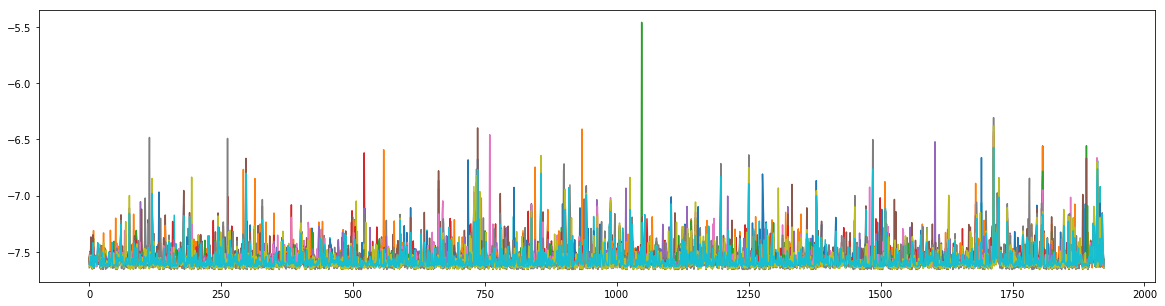

In [87]:
import numpy as np
from matplotlib import pyplot as plt
# Importo el paquete para graficar
from matplotlib import pyplot as plt

N=20
p_priori=list()
p_model=list()
num_arts=df.values.shape[0]
print("Cantidad de palabras en el vocabulario:")
print(num_cols)
plt.figure(figsize=(20, 5))
for i in range(20):
    p_aux=sum(df.loc[df['target_'] == i].drop('target_',axis=1).values)
    print("\nLog-probabilidad de ocurrencia de cada palabra en el vocabulario, para la categoría:{}".format(twenty_train["target_names"][i]))
    print(p_aux/sum(p_aux))
    p_priori.append(np.log(p_aux/sum(p_aux)))
    print("\nLog-probabilidad de ocurrencia de la categoría: {}".format(twenty_train["target_names"][i]))
    print(df.loc[df['target_'] == i].shape[0]/num_arts)
    p_model.append(np.log(df.loc[df['target_'] == i].shape[0]/num_arts))
     # Tamaño del gráfico
    plt.plot(p_priori[-1]) # Grafico
    #plt.title(title)
plt.show()

In [113]:
#Agarramos un artículo en particular y calculamos el Likelihood de cada una de las categorías
n_art=56
print("Vamos a calcular los Log-likelihood para cada categoría. Utilizaremos el artículo {}".format(n_art))
print("El artículo pertenece a la categoría {}, la cual es {}".format(twenty_train["target"][n_art], twenty_train["target_names"][twenty_train["target"][n_art] ] ))
maxLogL=-float('inf')
for i in range(20):
    logL=np.dot((X_train_data.toarray()[n_art]),p_priori[i])+p_model[i]
    print("El log-likelihood para la categoría {} del artículo {} es:{}".format(i,n_art,logL))
    if logL>maxLogL:
        maxIdx=i
        maxLogL=logL
print("El Log-likelihood mayor pertenece a la categoría: {}".format(maxIdx))

Vamos a calcular los Log-likelihood para cada categoría. Utilizaremos el artículo 56
El artículo pertenece a la categoría 7, la cual es rec.autos
El log-likelihood para la categoría 0 del artículo 56 es:-966.7778089375754
El log-likelihood para la categoría 1 del artículo 56 es:-970.2917449414151
El log-likelihood para la categoría 2 del artículo 56 es:-969.61224371004
El log-likelihood para la categoría 3 del artículo 56 es:-967.3764622690106
El log-likelihood para la categoría 4 del artículo 56 es:-970.3433323349021
El log-likelihood para la categoría 5 del artículo 56 es:-969.7347762960848
El log-likelihood para la categoría 6 del artículo 56 es:-974.3907775033374
El log-likelihood para la categoría 7 del artículo 56 es:-964.9981119070985
El log-likelihood para la categoría 8 del artículo 56 es:-969.5643504843558
El log-likelihood para la categoría 9 del artículo 56 es:-970.3451556109356
El log-likelihood para la categoría 10 del artículo 56 es:-971.1532247000666
El log-likelihood p

In [122]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_data.toarray(), twenty_train["target"])
print("La predicción para el artículo {} es:".format(n_art))
print(clf.predict(X_train_data.toarray()[n_art:n_art+1]))

La predicción para el artículo 56 es:
[7]


In [129]:
sum(np.array(clf.predict(X_train_data.toarray()))==np.array(twenty_train["target"]))

9562

3